In [70]:
# Resources:
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
# https://shrikar.com/deep-learning-with-keras-and-python-for-multiclass-classification/
# https://github.com/myleott/mnist_png
# https://yashk2810.github.io/Applying-Convolutional-Neural-Network-on-the-MNIST-dataset/
# https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
# https://machinelearningmastery.com/image-augmentation-deep-learning-keras/

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import backend as K

# Set the desired dimension of our input images, images will be resized
img_width, img_height = 28, 28

# Set the location of our input data
train_data_dir = 'data/train'
validation_data_dir = 'data/validation'

# Use as much of our data as possible, must be a multiple of our batch size
batch_size = 16
nb_train_samples = batch_size * 3000
nb_validation_samples = batch_size * 750
epochs = 200

# Determine shape of images based on current backend
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

# Construct our model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(128, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(256, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10)) # number of classes here
model.add(Activation('softmax'))

# Set up a couple different options for optimizers
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
rmsprop = optimizers.RMSprop(lr=0.0005, rho=0.9, epsilon=None, decay=0.0)
sgd = optimizers. SGD(lr=0.001, momentum=0.9)

# Compile our model with one of the aforementioned optimizers
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Augment our input data by generating new images
train_datagen = ImageDataGenerator(
    rotation_range=10,
    rescale=1. / 255,
    shear_range=0.1,
    horizontal_flip=False)

# Only augment our test images by resizing them
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Set up our training data generator
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size)

# Set up our validation data generator
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size)

# Save the best model if applicable after each epoch
save_each_callback = ModelCheckpoint('best.h5', monitor='val_loss', verbose=1,
                                     save_best_only=True, save_weights_only=False, mode='auto', period=1)

# Stop early if validation loss doesn't improve for N consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=25)

reducelr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, verbose=1,
                             mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)

# Start training
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[save_each_callback, early_stopping, reducelr])

Found 47995 images belonging to 10 classes.
Found 12005 images belonging to 10 classes.
Epoch 1/200
3000/3000 [==============================] - 31s 10ms/step - loss: 0.2780 - acc: 0.9129 - val_loss: 0.0913 - val_acc: 0.9710

Epoch 00001: val_loss improved from inf to 0.09133, saving model to best.h5
Epoch 2/200
3000/3000 [==============================] - 24s 8ms/step - loss: 0.1077 - acc: 0.9672 - val_loss: 0.0741 - val_acc: 0.9776

Epoch 00002: val_loss improved from 0.09133 to 0.07411, saving model to best.h5
Epoch 3/200
3000/3000 [==============================] - 24s 8ms/step - loss: 0.0842 - acc: 0.9749 - val_loss: 0.0586 - val_acc: 0.9831

Epoch 00003: val_loss improved from 0.07411 to 0.05859, saving model to best.h5
Epoch 4/200
3000/3000 [==============================] - 24s 8ms/step - loss: 0.0696 - acc: 0.9797 - val_loss: 0.0562 - val_acc: 0.9840

Epoch 00004: val_loss improved from 0.05859 to 0.05619, saving model to best.h5
Epoch 5/200
3000/3000 [========================

3000/3000 [==============================] - 24s 8ms/step - loss: 0.0034 - acc: 0.9988 - val_loss: 0.0628 - val_acc: 0.9897

Epoch 00041: val_loss did not improve from 0.05051
Epoch 42/200
3000/3000 [==============================] - 24s 8ms/step - loss: 0.0044 - acc: 0.9988 - val_loss: 0.0592 - val_acc: 0.9896

Epoch 00042: val_loss did not improve from 0.05051

Epoch 00042: ReduceLROnPlateau reducing learning rate to 7.289999985005124e-07.


Interpreted 7 as 2


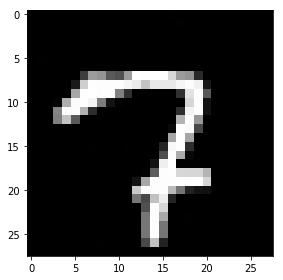

Interpreted 7 as 3


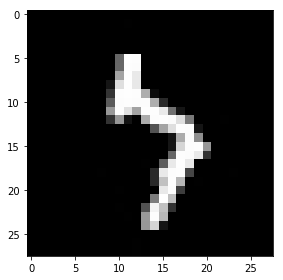

Interpreted 7 as 0


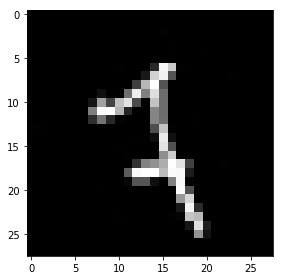

Interpreted 7 as 2


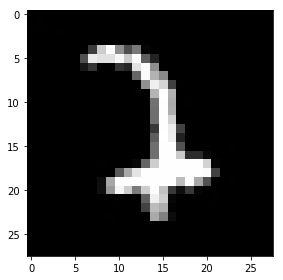

Interpreted 7 as 1


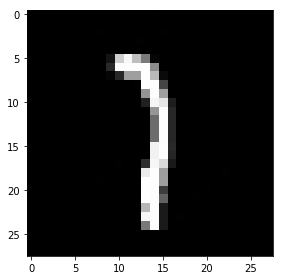

Interpreted 7 as 1


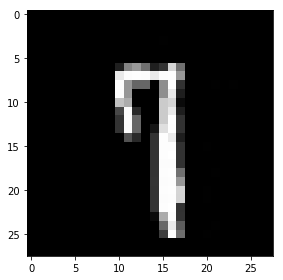

Interpreted 7 as 9


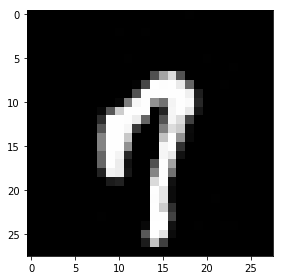

Interpreted 7 as 2


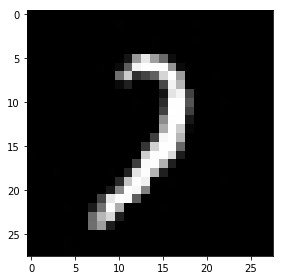

Interpreted 7 as 8


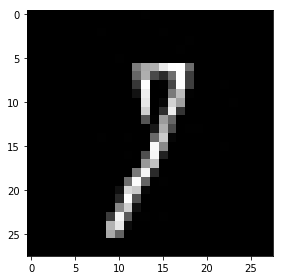

Interpreted 7 as 8


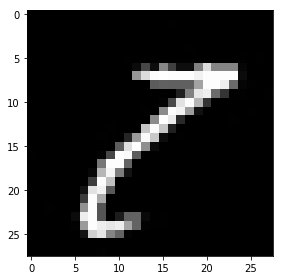

Interpreted 7 as 1


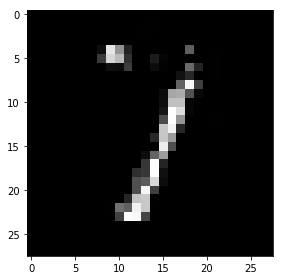

Interpreted 7 as 2


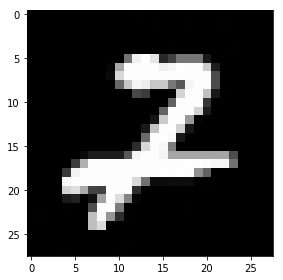

Interpreted 4 as 2


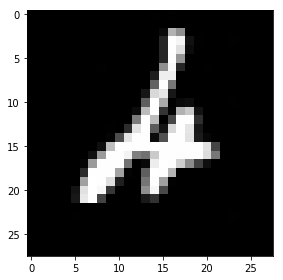

Interpreted 4 as 9


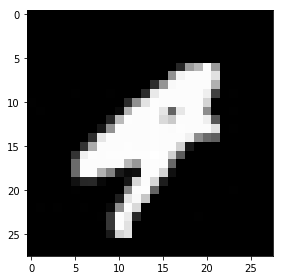

Interpreted 4 as 0


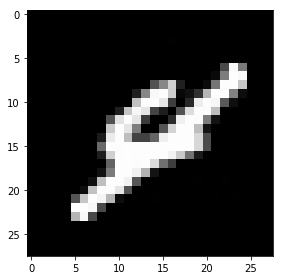

Interpreted 4 as 9


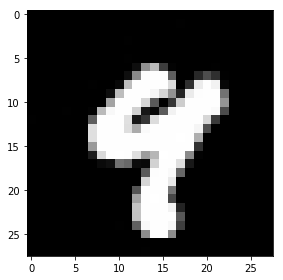

Interpreted 4 as 0


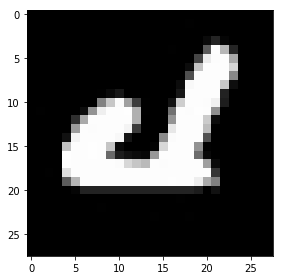

Interpreted 4 as 8


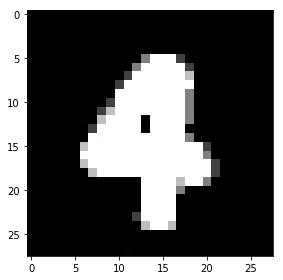

Interpreted 4 as 9


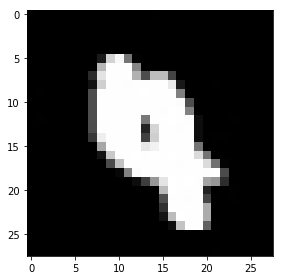

Interpreted 4 as 7


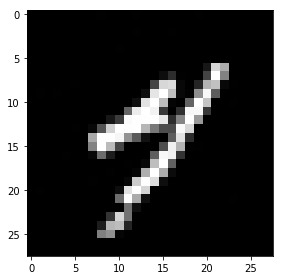

Interpreted 4 as 9


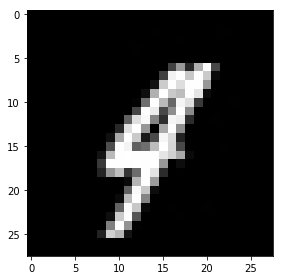

Interpreted 4 as 9


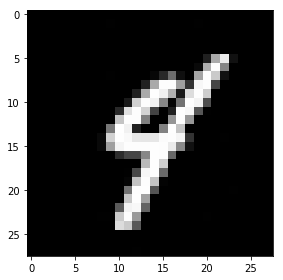

Interpreted 8 as 9


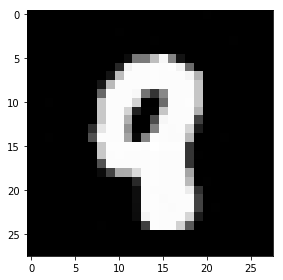

Interpreted 8 as 0


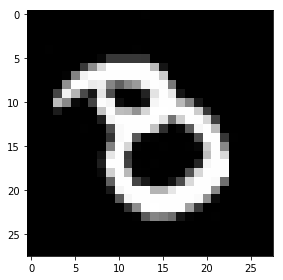

Interpreted 8 as 0


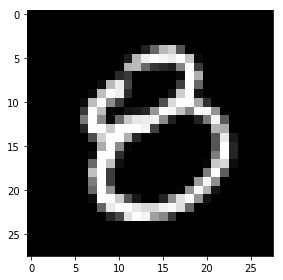

Interpreted 8 as 3


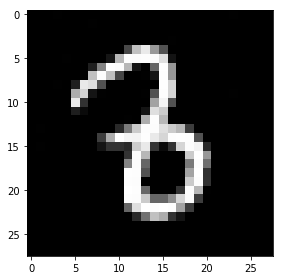

Interpreted 8 as 0


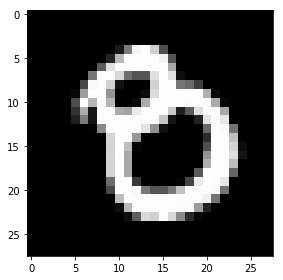

Interpreted 8 as 9


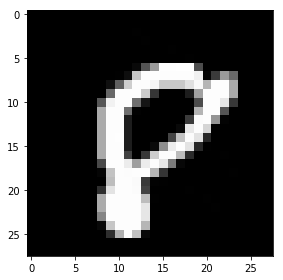

Interpreted 8 as 1


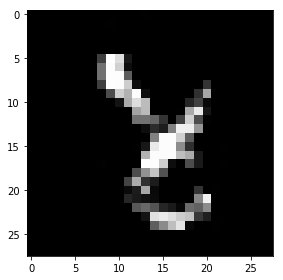

Interpreted 6 as 5


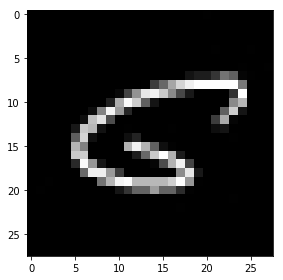

Interpreted 6 as 0


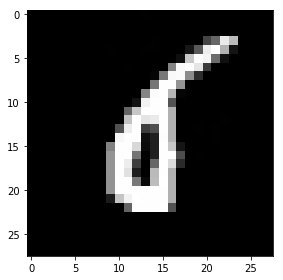

Interpreted 6 as 1


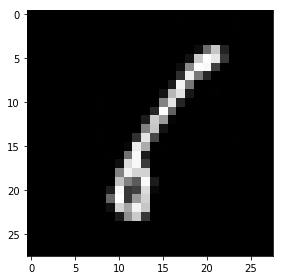

Interpreted 6 as 1


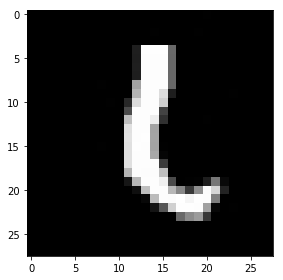

Interpreted 6 as 0


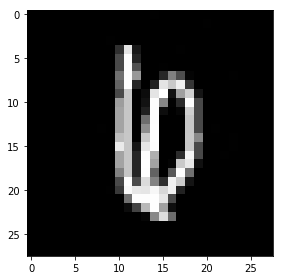

Interpreted 6 as 0


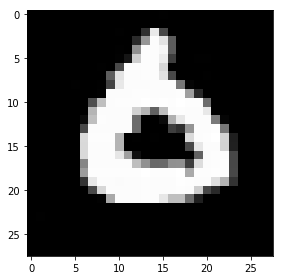

Interpreted 6 as 4


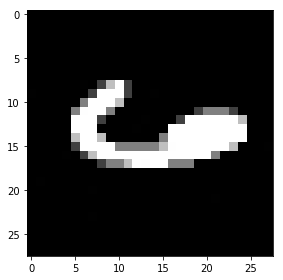

Interpreted 6 as 8


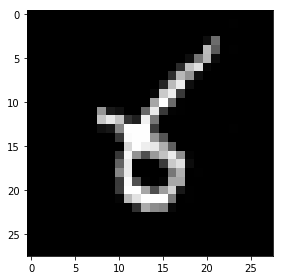

Interpreted 6 as 8


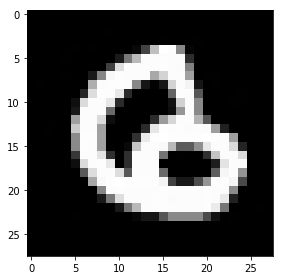

Interpreted 6 as 0


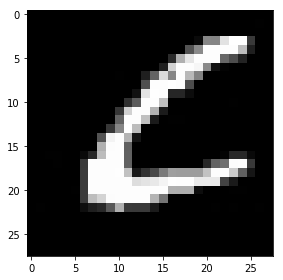

Interpreted 6 as 1


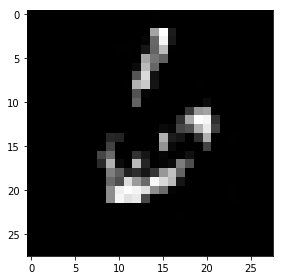

Interpreted 6 as 2


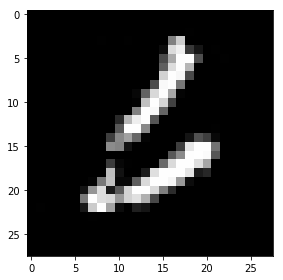

Interpreted 6 as 5


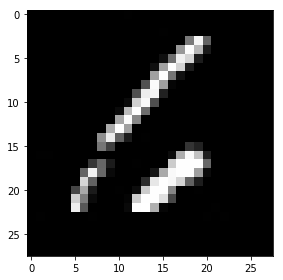

Interpreted 9 as 8


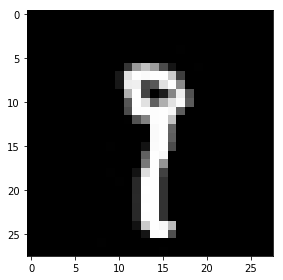

Interpreted 9 as 4


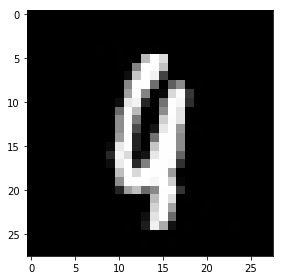

Interpreted 9 as 0


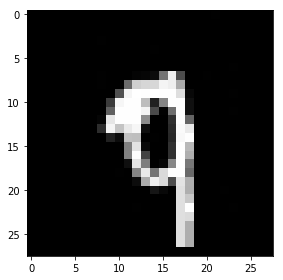

Interpreted 9 as 4


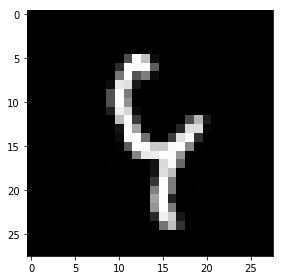

Interpreted 9 as 8


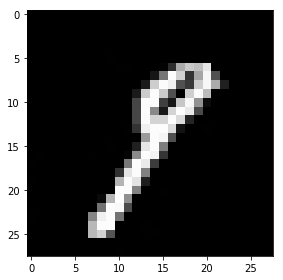

Interpreted 9 as 6


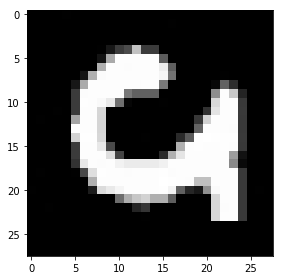

Interpreted 9 as 0


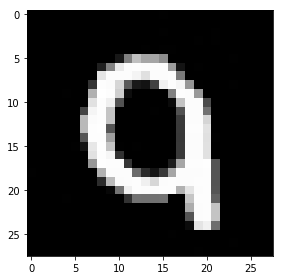

Interpreted 9 as 1


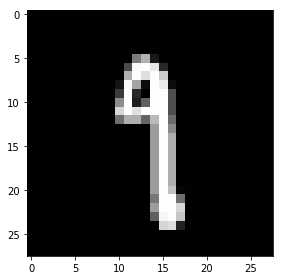

Interpreted 9 as 4


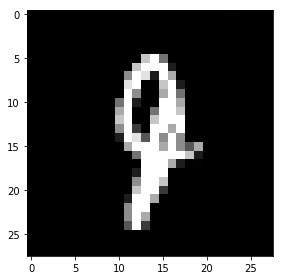

Interpreted 9 as 0


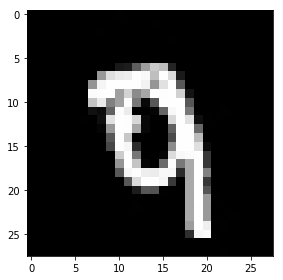

Interpreted 9 as 4


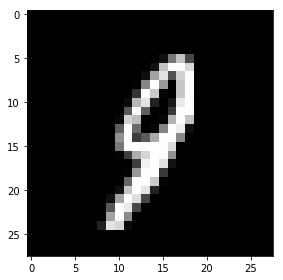

Interpreted 9 as 5


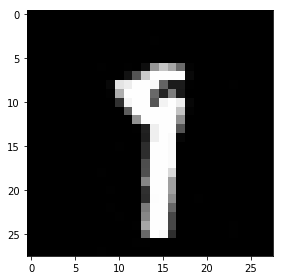

Interpreted 9 as 8


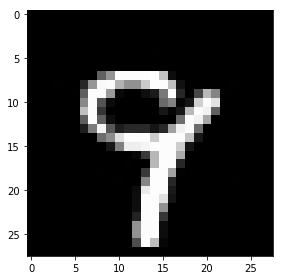

Interpreted 9 as 8


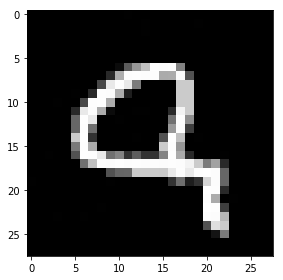

Interpreted 9 as 8


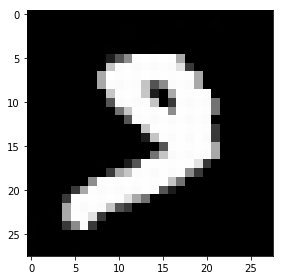

Interpreted 9 as 4


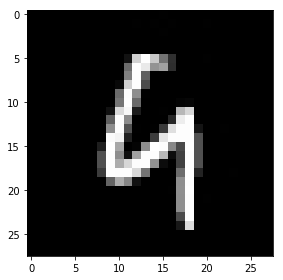

Interpreted 9 as 0


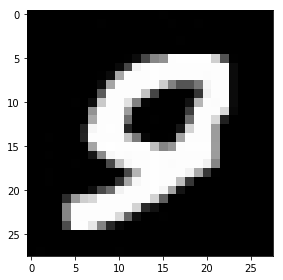

Interpreted 9 as 5


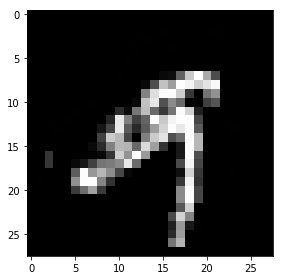

Interpreted 9 as 8


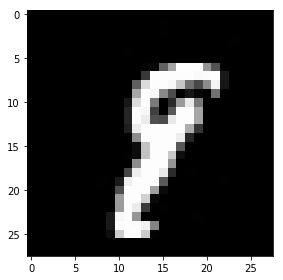

Interpreted 9 as 7


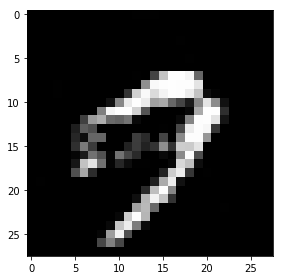

Interpreted 9 as 7


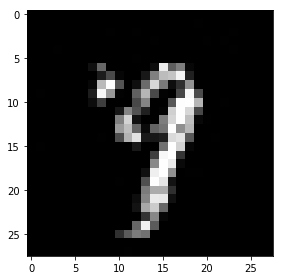

Interpreted 3 as 5


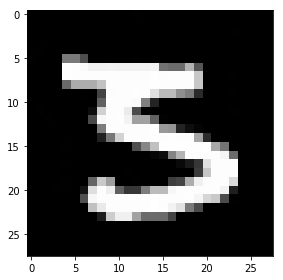

Interpreted 3 as 7


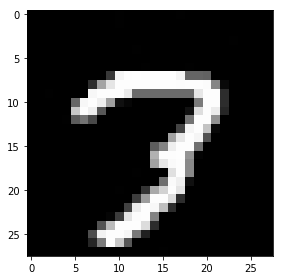

Interpreted 3 as 2


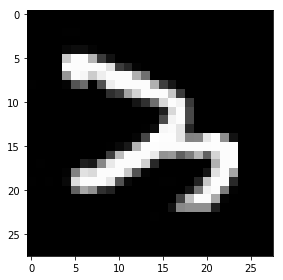

Interpreted 3 as 5


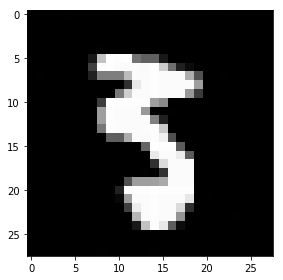

Interpreted 3 as 2


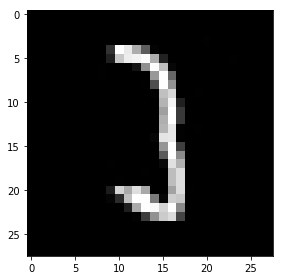

Interpreted 3 as 8


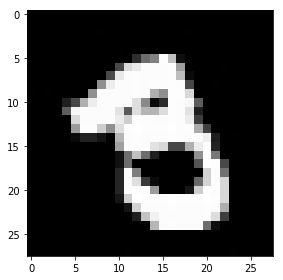

Interpreted 5 as 7


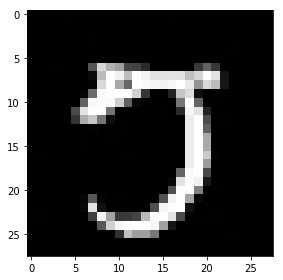

Interpreted 5 as 1


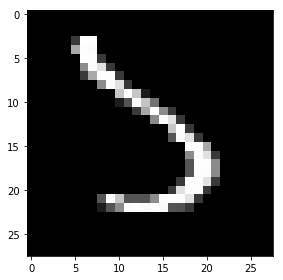

Interpreted 5 as 0


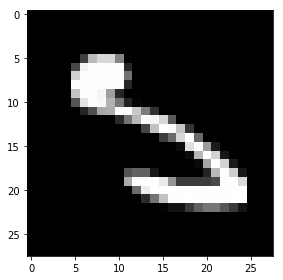

Interpreted 5 as 0


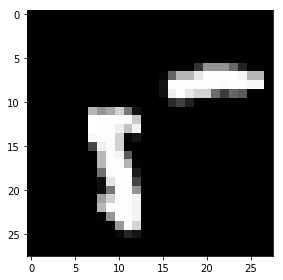

Interpreted 5 as 3


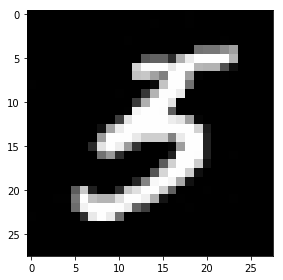

Interpreted 5 as 3


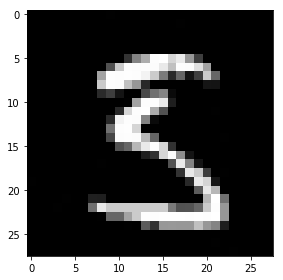

Interpreted 5 as 3


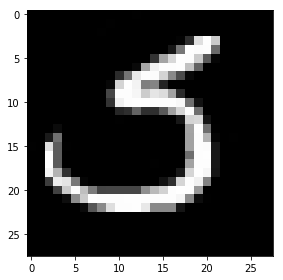

Interpreted 5 as 8


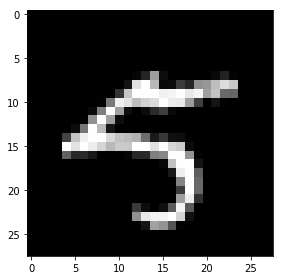

Interpreted 5 as 8


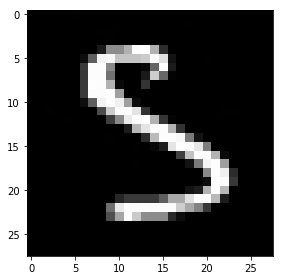

Interpreted 5 as 3


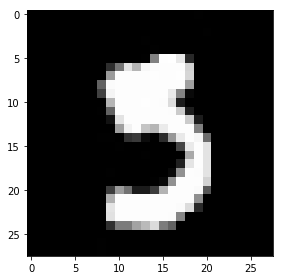

Interpreted 5 as 3


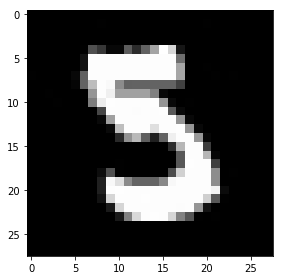

Interpreted 5 as 9


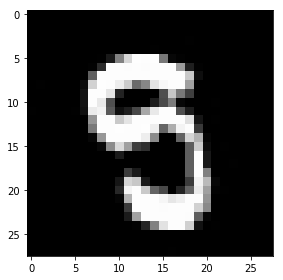

Interpreted 5 as 9


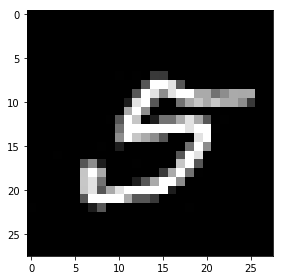

Interpreted 5 as 6


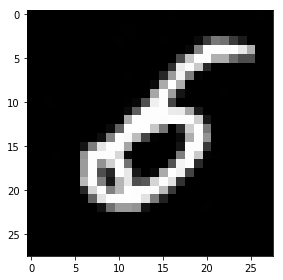

Interpreted 5 as 0


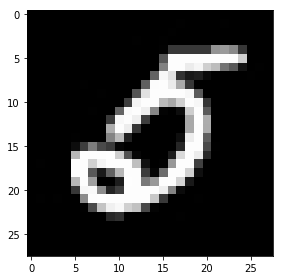

Interpreted 1 as 7


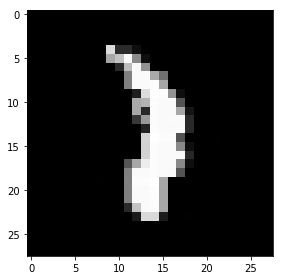

Interpreted 1 as 2


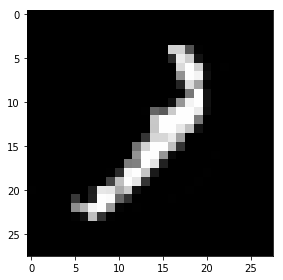

Interpreted 1 as 6


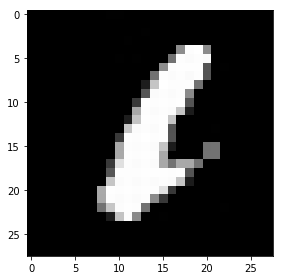

Interpreted 2 as 7


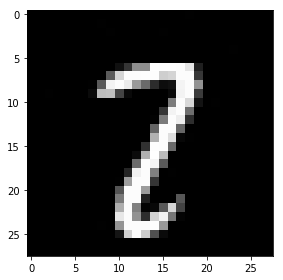

Interpreted 2 as 7


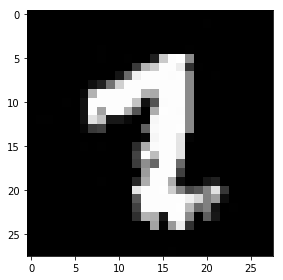

Interpreted 2 as 7


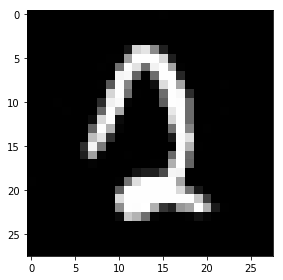

Interpreted 2 as 7


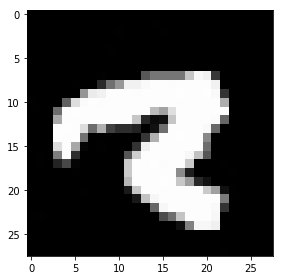

Interpreted 2 as 7


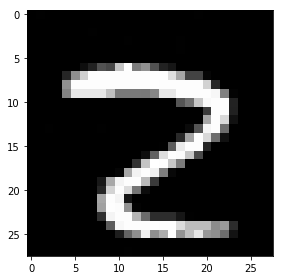

Interpreted 2 as 7


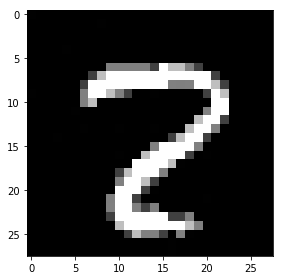

Interpreted 2 as 0


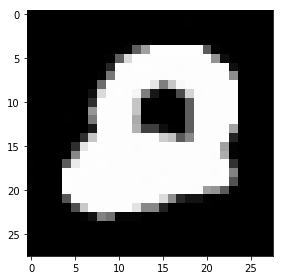

Interpreted 2 as 6


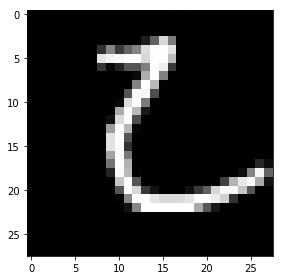

Interpreted 2 as 3


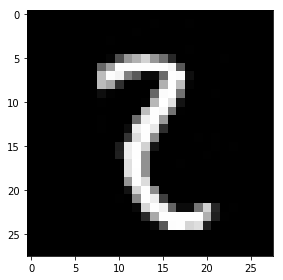

Interpreted 2 as 7


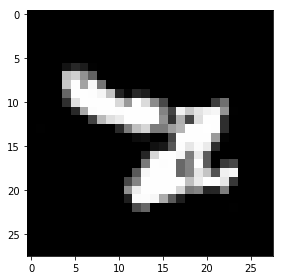

Interpreted 2 as 7


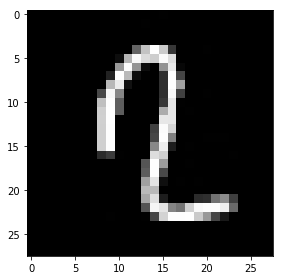

Interpreted 2 as 7


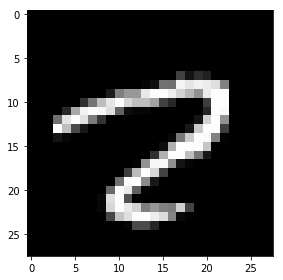

Interpreted 2 as 3


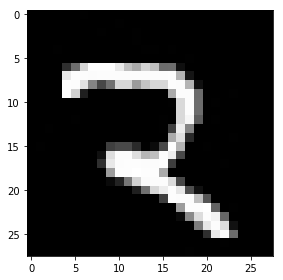

Interpreted 2 as 7


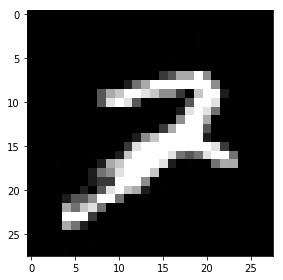

Interpreted 2 as 7


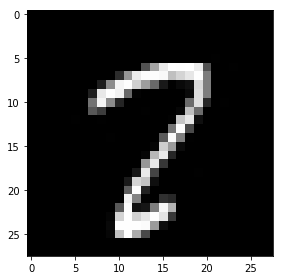

Interpreted 2 as 8


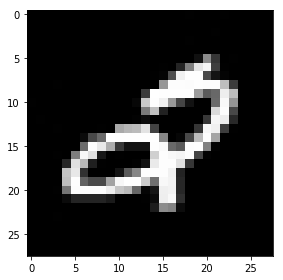

Interpreted 0 as 6


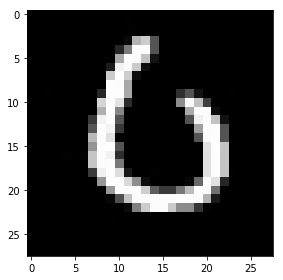

Interpreted 0 as 2


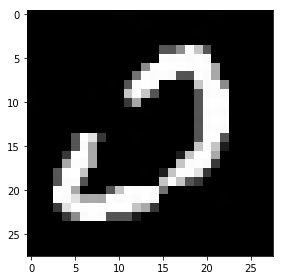

Interpreted 0 as 7


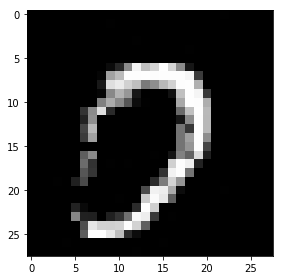

Interpreted 0 as 6


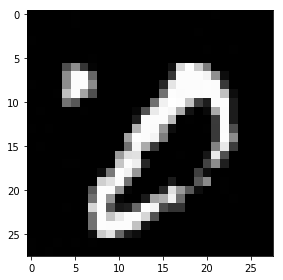

Accuracy: 0.9893


In [71]:
import numpy as np
import os
import re

from keras.models import load_model
from keras.preprocessing.image import img_to_array, load_img

import matplotlib.pyplot as plt
%matplotlib inline  
from skimage.io import imread, imshow, imread_collection, concatenate_images

# Set the desired dimension of our input images, images will be resized
img_width, img_height = 28, 28

# Load the best model from the training session
model = load_model('best.h5')

# Set the location of our input data
test_image_directory = 'data/test'

# Set up a sort method which does "natural sorting", this way filenames are
# sorted "1, 2, 3... 10" instead of "1, 10, 11... 2, 21, 22..."
def natural_sort_key(s, _nsre=re.compile('([0-9]+)')):
    return [int(text) if text.isdigit() else text.lower()
        for text in _nsre.split(s)]

# Iterate over all the test images with the aforementioned natural sort method
# and construct an array from the image, add it to an array of images
images_array = []
label_array = []
for root, dirs, files in os.walk(test_image_directory):
    for file in sorted(files, key=natural_sort_key):
        if file.endswith('.jpg'):
            image_path = root + '/' + file
            image = load_img(image_path, False, target_size=(img_width, img_height))
            image = img_to_array(image)
            image = image / 255
            images_array.append(image)
            label_array.append(root.split(os.sep)[2])

# Perform predictions based on each element in the images array and save the results
images = np.stack(images_array)
predictions = model.predict(images)
predictions = [np.argmax(np.array([int(round(n)) for n in p]), axis=0) for p in predictions]

results = []
for i, p in enumerate(predictions):
    match = int(p) == int(label_array[i])
    results.append(match)
    if not match:
        print('Interpreted', label_array[i], 'as', p)
        imshow(images[i])
        plt.show()
    
print('Accuracy:', results.count(True) / len(results))

Interpreted 7 as 7
Interpreted 4 as 9


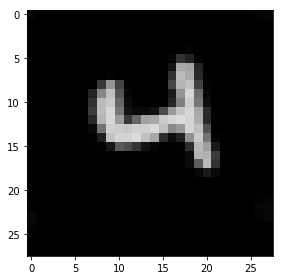

Interpreted 8 as 8
Interpreted 6 as 6
Interpreted 9 as 9
Interpreted 3 as 3
Interpreted 5 as 5
Interpreted 1 as 1
Interpreted 2 as 2
Interpreted 0 as 0
Accuracy: 0.9


In [72]:
import numpy as np
import os
import re

from keras.models import load_model
from keras.preprocessing.image import img_to_array, load_img

import matplotlib.pyplot as plt
%matplotlib inline  
from skimage.io import imread, imshow, imread_collection, concatenate_images

# Set the desired dimension of our input images, images will be resized
img_width, img_height = 28, 28

# Load the best model from the training session
model = load_model('best.h5')

# Set the location of our input data
test_image_directory = 'data/own_writing'

# Set up a sort method which does "natural sorting", this way filenames are
# sorted "1, 2, 3... 10" instead of "1, 10, 11... 2, 21, 22..."
def natural_sort_key(s, _nsre=re.compile('([0-9]+)')):
    return [int(text) if text.isdigit() else text.lower()
        for text in _nsre.split(s)]

# Iterate over all the test images with the aforementioned natural sort method
# and construct an array from the image, add it to an array of images
images_array = []
label_array = []
for root, dirs, files in os.walk(test_image_directory):
    for file in sorted(files, key=natural_sort_key):
        if file.endswith('.jpg'):
            image_path = root + '/' + file
            image = load_img(image_path, False, target_size=(img_width, img_height))
            image = img_to_array(image)
            image = image / 255
            images_array.append(image)
            label_array.append(root.split(os.sep)[2])

# Perform predictions based on each element in the images array and save the results
images = np.stack(images_array)
predictions = model.predict(images)
predictions = [np.argmax(np.array([int(round(n)) for n in p]), axis=0) for p in predictions]

results = []
for i, p in enumerate(predictions):
    print('Interpreted', label_array[i], 'as', p)
    match = int(p) == int(label_array[i])
    results.append(match)
    if not match:
        imshow(images[i])
        plt.show()
    
print('Accuracy:', results.count(True) / len(results))